In [52]:
import cv2
import torch
import urllib.request
import os
import numpy as np
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"


import matplotlib.pyplot as plt

model_type = "DPT_Large"     # MiDaS v3 - Large     (highest accuracy, slowest inference speed)
#model_type = "DPT_Hybrid"   # MiDaS v3 - Hybrid    (medium accuracy, medium inference speed)
#model_type = "MiDaS_small"  # MiDaS v2.1 - Small   (lowest accuracy, highest inference speed)

midas = torch.hub.load("intel-isl/MiDaS", model_type)

device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
midas.to(device)
midas.eval()

midas_transforms = torch.hub.load("intel-isl/MiDaS", "transforms")

if model_type == "DPT_Large" or model_type == "DPT_Hybrid":
    transform = midas_transforms.dpt_transform
else:
    transform = midas_transforms.small_transform

Using cache found in C:\Users\hugo2/.cache\torch\hub\intel-isl_MiDaS_master
Using cache found in C:\Users\hugo2/.cache\torch\hub\intel-isl_MiDaS_master


In [58]:


img = cv2.imread('good.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

input_batch = transform(img).to(device)

with torch.no_grad():
    prediction = midas(input_batch)

    prediction = torch.nn.functional.interpolate(
        prediction.unsqueeze(1),
        size=img.shape[:2],
        mode="bicubic",
        align_corners=False,
    ).squeeze()

output = prediction.cpu().numpy()
output = cv2.normalize(output, None, 0, 1, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_64F)
output = (output * 255).astype(np.uint8)
good = cv2.applyColorMap(output, cv2.COLORMAP_MAGMA)

# scale_percent = 40 # percent of original size
# width = int(output.shape[1] * scale_percent / 100)
# height = int(output.shape[0] * scale_percent / 100)
# dim = (width, height)

# output = cv2.resize(output, dim, interpolation=cv2.INTER_AREA)

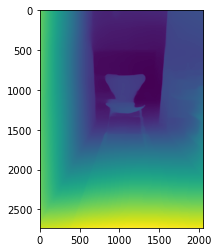

In [59]:
plt.imshow(output)

In [60]:
output[1000,1000]

47

In [43]:
output[2700, 1000]

249

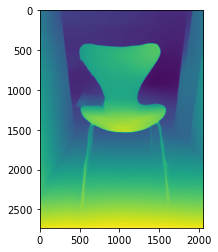

In [54]:
img = cv2.imread('middle.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

input_batch = transform(img).to(device)

with torch.no_grad():
    prediction = midas(input_batch)

    prediction = torch.nn.functional.interpolate(
        prediction.unsqueeze(1),
        size=img.shape[:2],
        mode="bicubic",
        align_corners=False,
    ).squeeze()

middle = prediction.cpu().numpy()
middle = cv2.normalize(middle, None, 0, 1, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_64F)
middle = (middle * 255).astype(np.uint8)
# middle = cv2.applyColorMap(output, cv2.COLORMAP_MAGMA)
plt.imshow(middle)

In [64]:
middle[2500, 1000]

218

In [65]:
middle.shape

(2731, 2048)

In [62]:
for x in np.nditer(middle):
    print(x)

KeyboardInterrupt: 

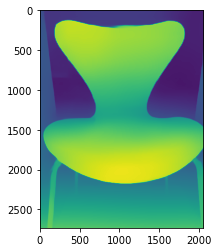

In [33]:
img = cv2.imread('not_good.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

input_batch = transform(img).to(device)

with torch.no_grad():
    prediction = midas(input_batch)

    prediction = torch.nn.functional.interpolate(
        prediction.unsqueeze(1),
        size=img.shape[:2],
        mode="bicubic",
        align_corners=False,
    ).squeeze()

output = prediction.cpu().numpy()
notGoodB = output
output = cv2.normalize(output, None, 0, 1, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_64F)
notGoodB = (output * 255).astype(np.uint8)
notGood = cv2.applyColorMap(notGoodB, cv2.COLORMAP_MAGMA)
plt.imshow(notGoodB)

In [34]:
notGoodB.shape

(2731, 2048)

In [ ]:
np.max

In [35]:
np.max(notGoodB)

254

In [ ]:
cv2.VideoCapture('chaise.mp4')

In [6]:
middle[1000,1000]

array([105,  72, 220], dtype=uint8)

In [7]:
good[1000, 1000]

array([105,  16,  52], dtype=uint8)

In [8]:
test.shape

(2731, 2048)

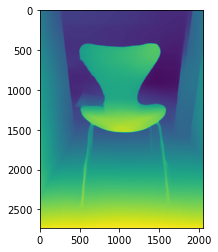

In [9]:
plt.imshow(test)

In [10]:
test[0,1000]

4.365487

In [11]:
test[2700,1000]

30.845718

In [14]:
np.max(googB)

41.641502

In [22]:
np.argmax(test)

5592110

In [23]:
test[5592110]

IndexError: index 5592110 is out of bounds for axis 0 with size 2731

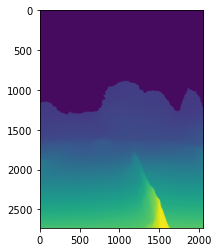

In [45]:
img = cv2.imread('paysage.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

input_batch = transform(img).to(device)

with torch.no_grad():
    prediction = midas(input_batch)

    prediction = torch.nn.functional.interpolate(
        prediction.unsqueeze(1),
        size=img.shape[:2],
        mode="bicubic",
        align_corners=False,
    ).squeeze()

proche = prediction.cpu().numpy()
# proche = cv2.normalize(proche, None, 0, 1, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_64F)
# proche = (proche * 255).astype(np.uint8)
plt.imshow(proche)

In [47]:
proche[2700,1500]

43.89088

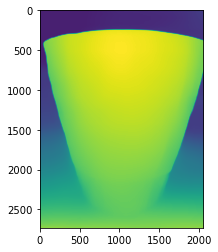

In [48]:
img = cv2.imread('proche.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

input_batch = transform(img).to(device)

with torch.no_grad():
    prediction = midas(input_batch)

    prediction = torch.nn.functional.interpolate(
        prediction.unsqueeze(1),
        size=img.shape[:2],
        mode="bicubic",
        align_corners=False,
    ).squeeze()

proche = prediction.cpu().numpy()
# proche = cv2.normalize(proche, None, 0, 1, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_64F)
# proche = (proche * 255).astype(np.uint8)
plt.imshow(proche)

In [49]:
np.max(proche)

29.10577